# Data ana with yc & Gabriel


In [108]:
#import modules and load finanial data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

dataset=pd.read_excel('tmp002.xls')
dataset.head()

,,"SUBSTR(EP.COMPANY_NAME,1,2)||'",订单编号,订单时间,支付时间,发货时间,状态,下单人账号,订单金额,应付金额,下单人电话,收货人姓名,收货人电话,商品名称,商品购买数量,商品价格_单价,抬头
0,1,潍坊*******有限公司,201901010000000301,2019-01-01 18:31:36,2020-03-03 17:21:33,2019-01-02 07:48:24,已付款,776678616A6A79786773,6412.18,6412.18,NaN,王**,1380****975,"电缆接线端子,铜镀锡,120mm2,单孔",288.0,13.44,国网*******有限公司
1,2,潍坊*******有限公司,201901010000000301,2019-01-01 18:31:36,2020-03-03 17:21:33,2019-01-02 07:48:24,已付款,776678616A6A79786773,6412.18,6412.18,NaN,王**,1380****975,"电缆接线端子,铜镀锡,25mm2,单孔",576.0,2.46,国网*******有限公司
2,3,潍坊*******有限公司,201901010000000301,2019-01-01 18:31:36,2020-03-03 17:21:33,2019-01-02 07:48:24,已付款,776678616A6A79786773,6412.18,6412.18,NaN,王**,1380****975,"电缆接线端子,铜镀锡,35mm2,单孔",346.0,3.25,国网*******有限公司
3,4,潍坊*******有限公司,201901010000000302,2019-01-01 18:31:42,2020-03-03 17:21:33,2019-01-02 07:48:01,已付款,776678616A6A79786773,373.75,373.75,NaN,王**,1380****975,"电缆接线端子,铜镀锡,35mm2,单孔",115.0,3.25,国网*******有限公司
4,5,南阳*******有限公司,201901010000000401,2019-01-01 18:31:37,NaN,2019-01-02 16:21:39,待付款,6E79737278383638,24679.00,24679.00,NaN,王**,1380****975,南阳瑞鑫+水泥制品，底盘，600x600x200,79.0,116.00,国网*******有限公司


In [91]:
#load cov19 data
cov19 = pd.read_excel('nCov-19-China.xlsx')
cov19.head()

,time,confirmed cases
0,2020-01-20,270.0
1,2020-01-21,375.0
2,2020-01-22,444.0
3,2020-01-23,549.0
4,2020-01-24,729.0


In [92]:
vocation = pd.read_excel('vocation.xlsx')
vocation.head()

,date,vocation
0,2020-01-01,0
1,2020-01-02,0
2,2020-01-03,0
3,2020-01-04,0
4,2020-01-05,0


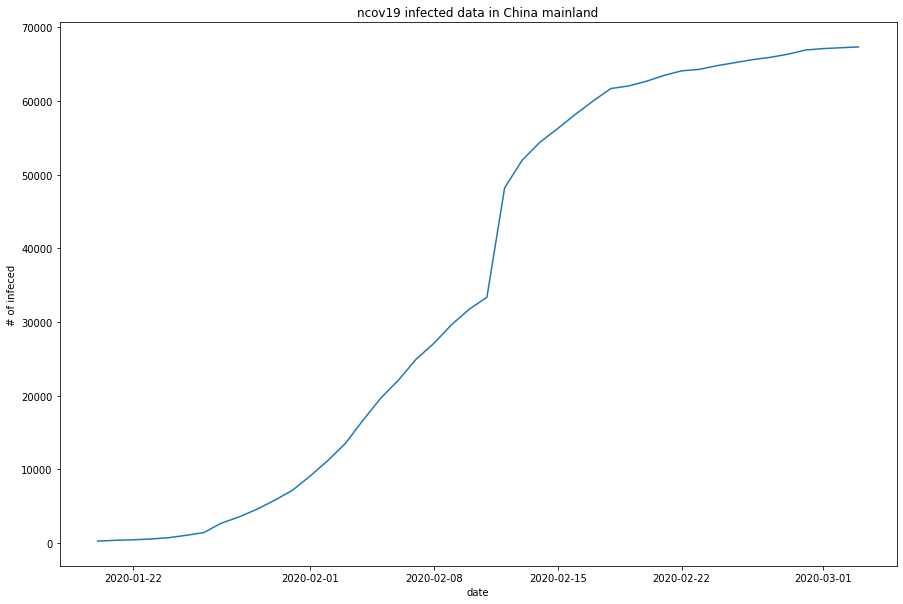

In [31]:
#plot ncov19 infected data in China mainland
plt.figure(figsize=(15,10))
plt.subplot(1,1,1)
plt.title("ncov19 infected data in China mainland")
plt.xlabel("date")
plt.ylabel("# of infeced")
plt.plot(cov19["time"],cov19["confirmed cases"])


In [109]:
#rename columns
dataset = dataset.rename(columns={"SUBSTR(EP.COMPANY_NAME,1,2)||'":"cop name", "订单编号":"order_id", "订单时间":"order_time","支付时间":"pay_time", "发货时间":"shipping_time","状态":"status", "下单人账号":"payer_id","订单金额":"amount","应付金额":"total_amount","下单人账号":"order_placer_id"})
dataset["pay_time_date"] = pd.to_datetime(dataset['pay_time'])

In [110]:
#remove duplicate rows
dataset = dataset.groupby("order_id").first()
dataset.head()

,,cop name,order_time,pay_time,shipping_time,status,order_placer_id,amount,total_amount,下单人电话,收货人姓名,收货人电话,商品名称,商品购买数量,商品价格_单价,抬头,pay_time_date
order_id,,,,,,,,,,,,,,,,,
201901010000000301,1,潍坊*******有限公司,2019-01-01 18:31:36,2020-03-03 17:21:33,2019-01-02 07:48:24,已付款,776678616A6A79786773,6412.18,6412.18,NaN,王**,1380****975,"电缆接线端子,铜镀锡,120mm2,单孔",288.0,13.44,国网*******有限公司,2020-03-03 17:21:33
201901010000000302,4,潍坊*******有限公司,2019-01-01 18:31:42,2020-03-03 17:21:33,2019-01-02 07:48:01,已付款,776678616A6A79786773,373.75,373.75,NaN,王**,1380****975,"电缆接线端子,铜镀锡,35mm2,单孔",115.0,3.25,国网*******有限公司,2020-03-03 17:21:33
201901010000000401,5,南阳*******有限公司,2019-01-01 18:31:37,NaN,2019-01-02 16:21:39,待付款,6E79737278383638,24679.00,24679.00,NaN,王**,1380****975,南阳瑞鑫+水泥制品，底盘，600x600x200,79.0,116.00,国网*******有限公司,NaT
201901010000000501,8,山东*******有限公司,2019-01-01 18:31:44,NaN,2019-01-02 09:27:52,待付款,636E373236323236333735,17760.34,17760.34,1831****999,王**,1380****975,"耐张线夹-楔型绝缘,NXL-3",166.0,55.00,国网*******有限公司,NaT
201901010000000601,12,得力*******有限公司,2019-01-01 22:18:29,2019-04-16 15:40:04,2019-01-02 14:17:03,已付款,475753433030313630313530,238.94,238.94,1875****618,熊**,1851****053,山业 200-BAG067WP 商务电脑包黑色(单位：个),1.0,238.94,国家*******有限公司,2019-04-16 15:40:04


In [111]:
dataset["payment_year"]= dataset['pay_time_date'].dt.year
data2020 = dataset[dataset["payment_year"] == 2020]
data2020 = data2020.loc[:, ["cop name","pay_time","amount","total_amount","商品购买数量",'商品价格_单价',"pay_time_date"]]
data2020['num_of_order'] = 1
data2020.head()

,cop name,pay_time,amount,total_amount,商品购买数量,商品价格_单价,pay_time_date,num_of_order
order_id,,,,,,,,
201901010000000301,潍坊*******有限公司,2020-03-03 17:21:33,6412.18,6412.18,288.0,13.44,2020-03-03 17:21:33,1
201901010000000302,潍坊*******有限公司,2020-03-03 17:21:33,373.75,373.75,115.0,3.25,2020-03-03 17:21:33,1
201901030000000397,得力*******有限公司,2020-01-20 05:29:43,13342.55,13342.55,15.0,665.44,2020-01-20 05:29:43,1
201901030000000407,南京*******有限公司,2020-01-18 09:48:55,248356.35,248356.35,100.0,1753.41,2020-01-18 09:48:55,1
201901030000000408,上海*******有限公司,2020-01-20 05:54:36,71683.83,71683.83,486.0,16.98,2020-01-20 05:54:36,1


In [112]:
data2020['date'] = data2020['pay_time'].str.extract(r"(\d\d\d\d-\d\d-\d\d)")
new = data2020.groupby('date').agg(sum)
new=new.reset_index()


In [113]:
print(type(new),type(cov19))
convert_dict = {'date': str} 
new = new.astype(convert_dict)
cov19 = cov19.astype({'time':str})
vocation = vocation.astype({"date":str})
new['date'] = pd.to_datetime(new['date'])
cov19['time'] = pd.to_datetime(cov19['time'])
vocation['date'] = pd.to_datetime(vocation['date'])

merged = vocation.merge(cov19, left_on = "date", right_on = 'time', how="outer").fillna(0)
merged = merged.merge(new,left_on = "date",right_on = "date",how="outer",sort=False).fillna(0)

merged.head()

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>


,date,vocation,time,confirmed cases,amount,total_amount,商品购买数量,商品价格_单价,num_of_order
0,2020-01-01,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,2020-01-02,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,2020-01-03,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,2020-01-04,0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,2020-01-05,0,0,0.0,0.0,0.0,0.0,0.0,0.0


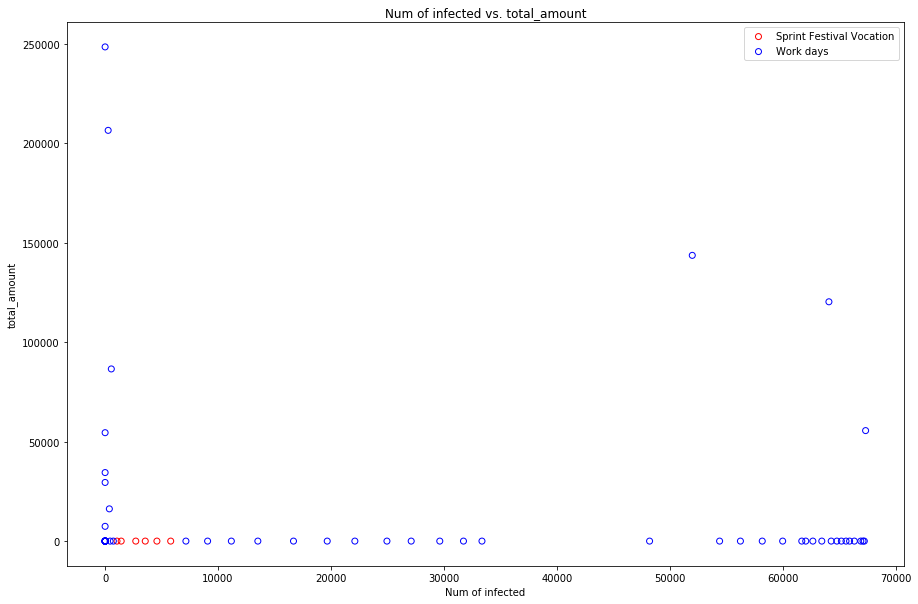

In [118]:
merged_vocation = merged[merged['vocation'] == 1]
merged_not_vocation = merged[merged['vocation'] == 0]

plt.figure(figsize=(15,10))
plt.title("Num of infected vs. total_amount")
plt.xlabel("Num of infected")
plt.ylabel("total_amount")
plt.scatter(merged_vocation["confirmed cases"], merged_vocation["total_amount"],facecolors='none',edgecolors='r',label="Sprint Festival Vocation")
plt.scatter(merged_not_vocation["confirmed cases"], merged_not_vocation["total_amount"],facecolors='none',edgecolors='b',label="Work days")
plt.legend()
